<a href="https://colab.research.google.com/github/fikisug/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Tugas Praktikum Morfologi**

> # 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
# Impor modul drive dari pustaka Google Colab untuk mengakses Google Drive
from google.colab import drive

# Mount Google Drive ke direktori /content/drive
# Ini akan meminta Anda untuk memberikan kode otorisasi melalui tautan yang diberikan
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> # 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
# Impor modul OpenCV (cv2) untuk pemrosesan gambar
import cv2

# Impor fungsi cv2_imshow dari modul google.colab.patches untuk menampilkan gambar di Colab
from google.colab.patches import cv2_imshow

# Impor modul numpy (np) untuk pemrosesan array dan matriks numerik
import numpy as np

# Impor modul pyplot dari matplotlib untuk membuat plot dan visualisasi data
from matplotlib import pyplot as plt

> # 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)


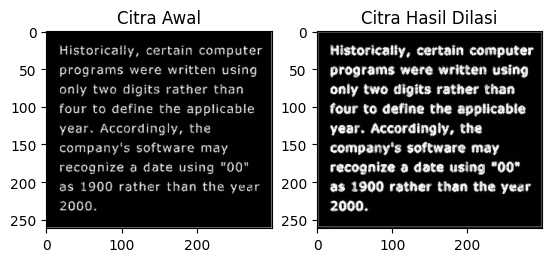

In [ ]:
# Fungsi untuk melakukan operasi dilasi pada gambar
def dilasi(image):
    # Mendapatkan dimensi tinggi dan lebar gambar
    height, width = image.shape

    # Inisialisasi matriks hasil dengan nol, dengan tipe data uint8
    result = np.zeros((height, width), dtype=np.uint8)

    # Kernel dilasi yang digunakan, yaitu cross 3x3
    cross = np.array([[0, 1, 0],
                      [1, 1, 1],
                      [0, 1, 0]], dtype=np.uint8)

    # Melakukan iterasi pada setiap piksel dalam gambar
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Mendapatkan ROI (Region of Interest) berukuran 3x3
            roi = image[i - 1:i + 2, j - 1:j + 2]

            # Melakukan operasi dilasi dengan mengambil nilai maksimum dari hasil perkalian ROI dengan kernel
            result[i, j] = np.max(roi * cross)

    return result

# Membaca gambar grayscale dari lokasi tertentu pada Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv2.IMREAD_GRAYSCALE)

# Memanggil fungsi dilasi untuk mendapatkan citra hasil
dilated_image = dilasi(image)

# Menampilkan citra asli dan citra hasil dilasi
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(122)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

> # 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


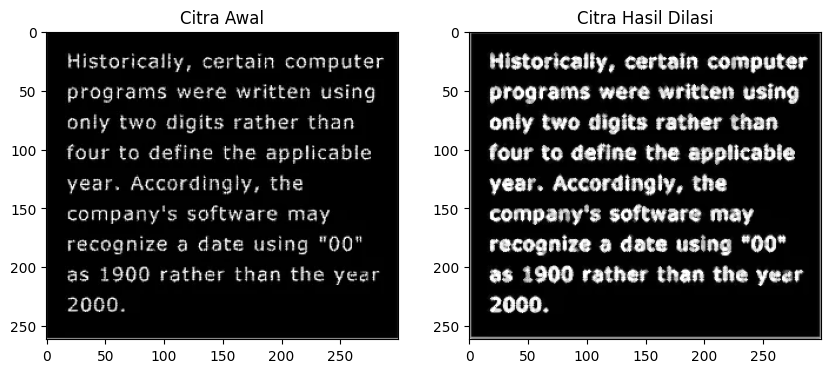

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SED) berbentuk cross 3x3
sed = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Lakukan operasi dilasi pada citra menggunakan SED
dilated_image = cv2.dilate(image, sed)

# Tampilkan Structuring Element (SED)
print(sed)

# Tampilkan citra asli dan citra hasil dilasi dalam satu tampilan berdampingan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

> # 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

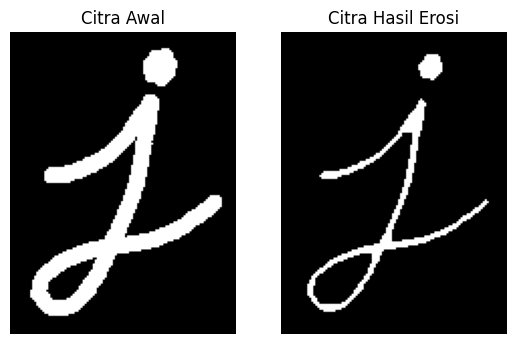

In [ ]:
# Fungsi untuk melakukan operasi erosi
def erosi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(2, height - 2):
        for j in range(2, width - 2):
            # Buat Structuring Element (SE) berbentuk square 5x5 yang terdiri dari nilai 1
            se = np.ones((5, 5), dtype=np.uint8)

            # Region of Interest (ROI) pada citra berukuran 5x5
            roi = image[i - 2:i + 3, j - 2:j + 3]

            # Operasi erosi: Mengambil nilai minimum dari hasil perkalian ROI dengan SE
            result[i, j] = np.min(roi * se)

    return result

# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Panggil fungsi erosi untuk mendapatkan citra hasil erosi
eroded_image = erosi(image)

# Tampilkan citra asli
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Tampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

> # 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

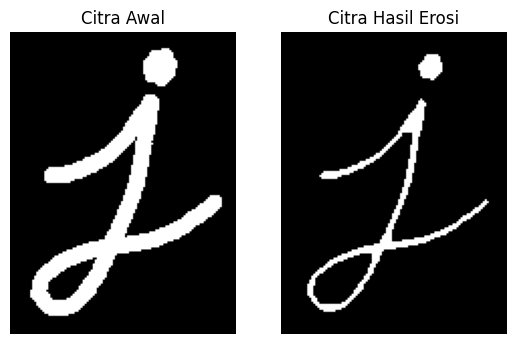

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 5x5 yang terdiri dari nilai 1
kernel = np.ones((5, 5), np.uint8)

# Lakukan operasi erosi dengan OpenCV
eroded_image = cv2.erode(image, kernel, iterations=1)

# Tampilkan citra asli
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Tampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

> # 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

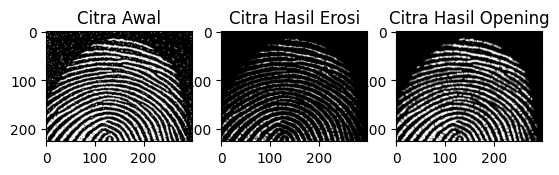

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3 yang terdiri dari nilai 1
se = np.ones((3, 3), dtype=np.uint8)

# Operasi erosi
eroded_image = cv2.erode(image, se, iterations=1)

# Operasi dilasi
dilated_image = cv2.dilate(eroded_image, se, iterations=1)

# Tampilkan citra asli
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')

# Tampilkan hasil erosi
plt.subplot(132)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

# Tampilkan hasil opening
plt.subplot(133)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

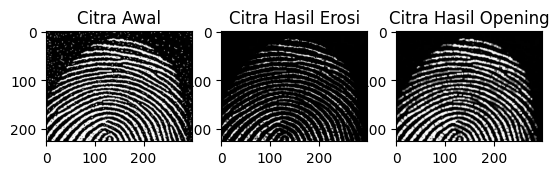

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Operasi erosi
eroded_image = cv2.erode(image, kernel, iterations=1)

# Operasi opening menggunakan morphology dari OpenCV
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Tampilkan citra asli
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Awal')

# Tampilkan hasil erosi
plt.subplot(132)
plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Erosi')

# Tampilkan hasil opening
plt.subplot(133)
plt.imshow(cv2.cvtColor(opened_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Opening')

plt.show()

> # 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

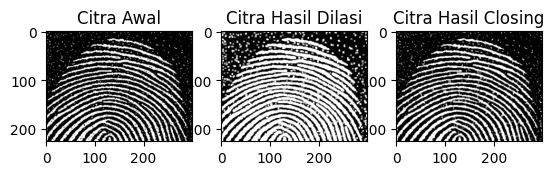

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3 yang terdiri dari nilai 1
se = np.ones((3, 3), dtype=np.uint8)

# Operasi dilasi
dilated_image = cv2.dilate(image, se, iterations=1)

# Operasi erosi
closed_image = cv2.erode(dilated_image, se, iterations=1)

# Tampilkan citra asli
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')

# Tampilkan hasil dilasi
plt.subplot(132)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

# Tampilkan hasil closing
plt.subplot(133)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

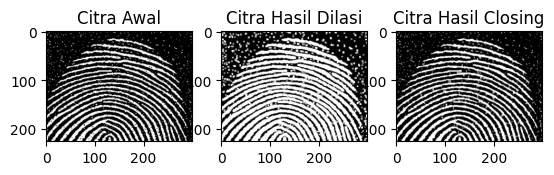

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3 menggunakan cv2.getStructuringElement
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Operasi dilasi
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Operasi closing menggunakan morphology dari OpenCV
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Tampilkan citra asli
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Awal')

# Tampilkan hasil dilasi
plt.subplot(132)
plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Dilasi')

# Tampilkan hasil closing
plt.subplot(133)
plt.imshow(cv2.cvtColor(closed_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Closing')

plt.show()

> # 9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SED = Cross 3


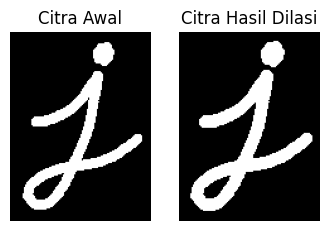

SED = Cross 5


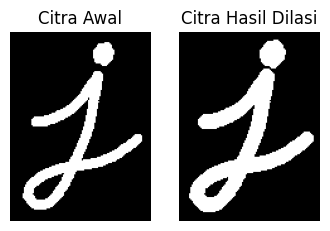

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk cross 3x3
sed_3x3 = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Buat Structuring Element (SE) berbentuk cross 5x5
sed_5x5 = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [1, 1, 1, 1, 1],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

# Lakukan operasi dilasi dengan SE 3x3
dilated_image_3x3 = cv2.dilate(image, sed_3x3)

# Lakukan operasi dilasi dengan SE 5x5
dilated_image_5x5 = cv2.dilate(image, sed_5x5)

# Tampilkan teks "SED = 3"
print('SED = Cross 3')

# Tampilkan Citra Asli dan Citra Hasil Dilasi dengan SE 3x3
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')
plt.show()

# Tampilkan teks "SED = 5"
print('SED = Cross 5')

# Tampilkan Citra Asli dan Citra Hasil Dilasi dengan SE 5x5
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')
plt.show()

> # 10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SED = Circle 3


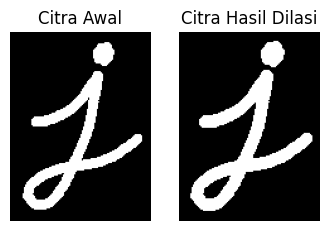

SED = Circle 5


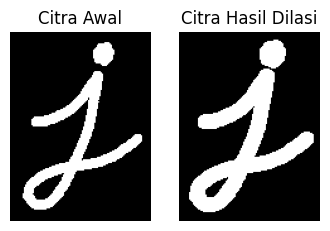

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk circular 3x3
sed_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Buat Structuring Element (SE) berbentuk circular 5x5
sed_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Lakukan operasi dilasi dengan SE 3x3
dilated_image_3x3 = cv2.dilate(image, sed_3x3)

# Lakukan operasi dilasi dengan SE 5x5
dilated_image_5x5 = cv2.dilate(image, sed_5x5)

# Tampilkan teks "SE = Circle 3"
print('SED = Circle 3')

# Tampilkan Citra Asli dan Citra Hasil Dilasi dengan SE 3x3
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')
plt.show()

# Tampilkan teks "SE = Circle 5"
print('SED = Circle 5')

# Tampilkan Citra Asli dan Citra Hasil Dilasi dengan SE 5x5
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')
plt.show()

> # 11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SE = Rectangle 3x5


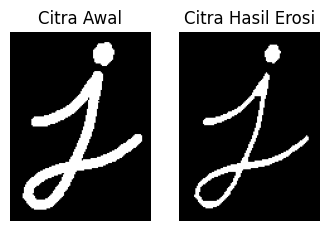

SE = Rectangle 5x7


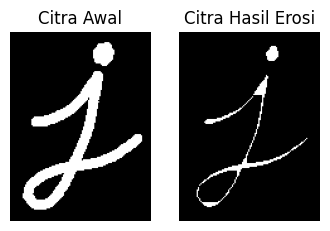

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk rectangle 3x5
sed_3x5 = np.ones((3, 5), dtype=np.uint8)

# Buat Structuring Element (SE) berbentuk rectangle 5x7
sed_5x7 = np.ones((5, 7), dtype=np.uint8)

# Tampilkan teks "SED = Rectangle 3x5"
print('SE = Rectangle 3x5')

# Tampilkan Citra Asli dan Citra Hasil Erosi dengan SE 3x5
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122)
eroded_image_3x5 = cv2.erode(image, sed_3x5)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')
plt.show()

# Tampilkan teks "SED = Rectangle 5x7"
print('SE = Rectangle 5x7')

# Tampilkan Citra Asli dan Citra Hasil Erosi dengan SE 5x7
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
plt.subplot(122)
eroded_image_5x7 = cv2.erode(image, sed_5x7)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')
plt.show()

> # 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SE = Line Vertikal 3


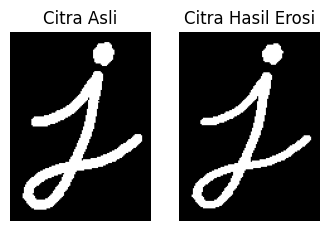

SE = Line Vertikal 5


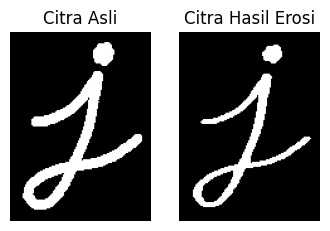

In [ ]:
# Baca citra grayscale dari lokasi tertentu di Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk Line Vertikal 3
sed_3 = np.ones((3, 1), dtype=np.uint8)

# Buat Structuring Element (SE) berbentuk Line Vertikal 5
sed_5 = np.ones((5, 1), dtype=np.uint8)

# Tampilkan teks "SE = Line Vertikal 3"
print('SE = Line Vertikal 3')

# Tampilkan Citra Asli dan Citra Hasil Erosi dengan SE 3
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')
plt.subplot(122)
eroded_image_3 = cv2.erode(image, sed_3)
plt.imshow(eroded_image_3, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')
plt.show()

# Tampilkan teks "SE = Line Vertikal 5"
print('SE = Line Vertikal 5')

# Tampilkan Citra Asli dan Citra Hasil Erosi dengan SE 5
plt.figure(figsize=(4, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')
plt.subplot(122)
eroded_image_5 = cv2.erode(image, sed_5)
plt.imshow(eroded_image_5, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')
plt.show()